In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, recall_score
from imblearn.over_sampling import SMOTE
import shap
import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_excel('Loan_Default_Data.xlsx')
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [48]:
# Initial Check

print("Shape of data is:",df.shape)
print("Columns of dataset are:\n",df.columns)
print("Missing values are:\n",df.isnull().sum())
print(df.dtypes)

Shape of data is: (255347, 18)
Columns of dataset are:
 Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')
Missing values are:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64
LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRa

In [49]:
# Clean data
df.drop(columns=['LoanID'], axis=1, inplace=True)

binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [38]:
# cheking missing values
df.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [39]:
df.drop('LoanID', axis= 1, inplace=True)

In [40]:
# Encode binary categorical features

binary_cols = ['HasMortgage','HasDependents','HasCoSigner']
for col in binary_cols:
    df[col] = df[col].map({'Yes':1, 'No': 0})

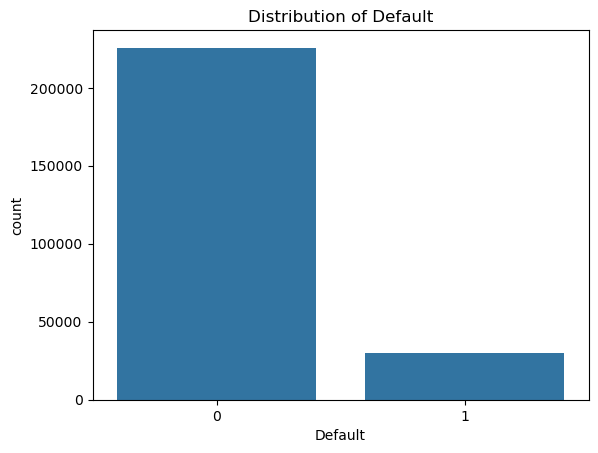

In [50]:
# EDA - Target Disttribution
sns.countplot(data=df, x='Default')
plt.title("Distribution of Default")
plt.show()

In [51]:
# Summary Stats
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,HasDependents,HasCoSigner,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.500014,0.500268,0.500108,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.500001,0.500001,0.500001,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,1.000000,1.000000,1.000000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,1.000000,1.000000,1.000000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000,1.000000,1.000000,1.000000


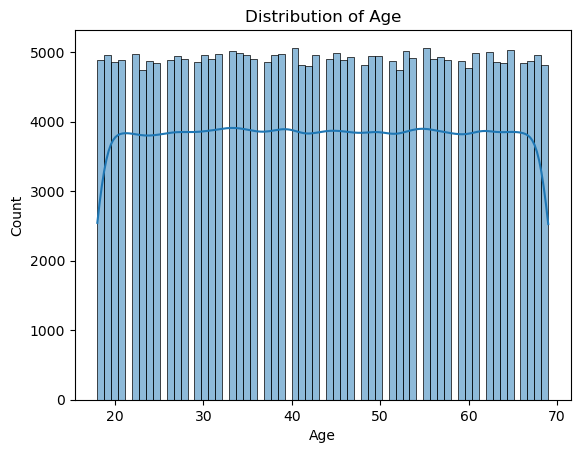

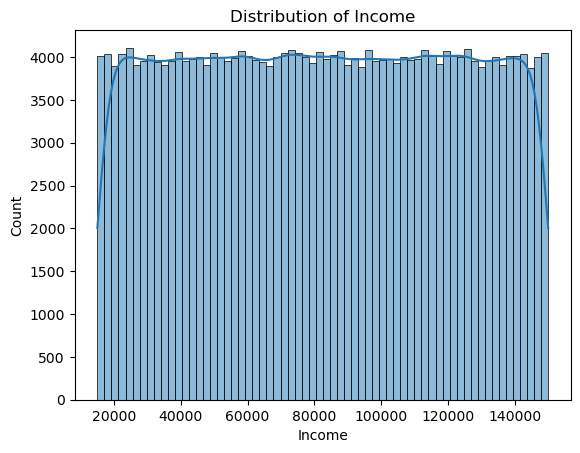

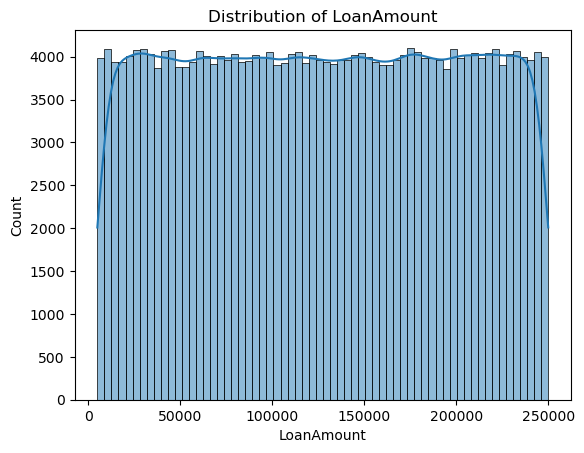

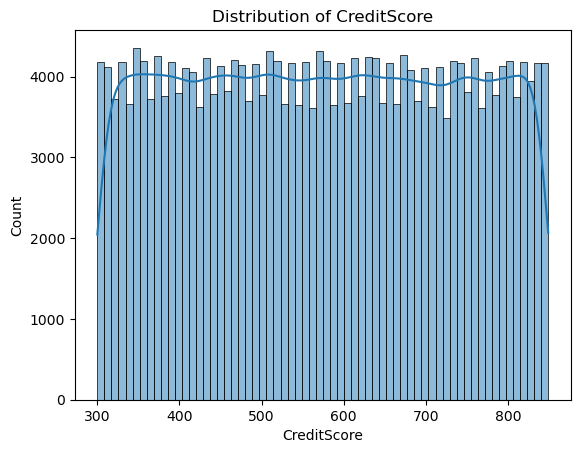

In [63]:
# Visual EDA - Numeric Distributions
num_cols = ['Age', 'Income', 'LoanAmount', 'CreditScore']
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

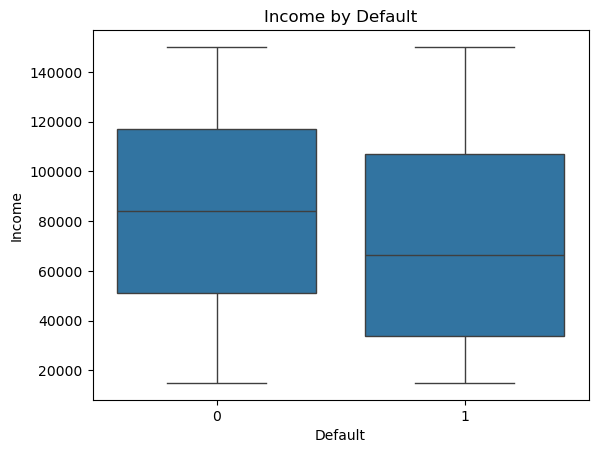

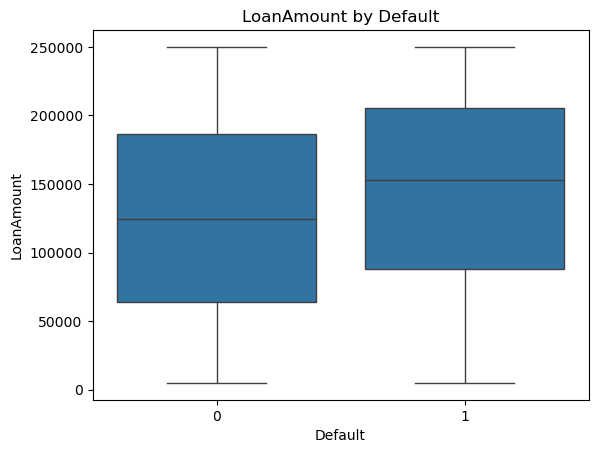

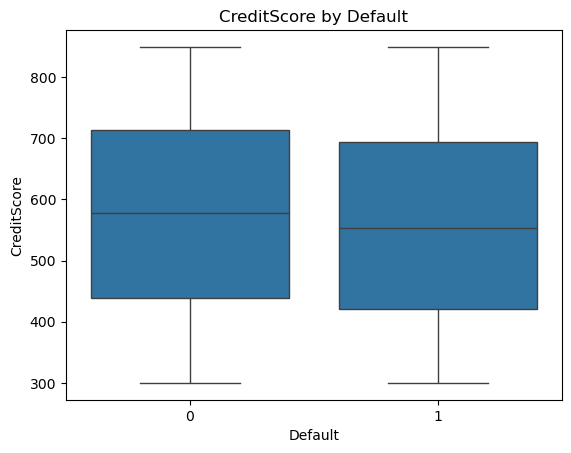

In [52]:
# Outlier Detection via Boxplots
for col in ['Income', 'LoanAmount', 'CreditScore']:
    sns.boxplot(data=df, x='Default', y=col)
    plt.title(f"{col} by Default")
    plt.show()

In [ ]:
# Feature Engineering - One Hot Encoding
df = pd.get_dummies(df, columns=['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose'], drop_first=True)

In [64]:
# Prepare for Modeling
X = df.drop('Default', axis=1)
y = df['Default']
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [66]:
# 11. Train/Test Split + SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

print("\nBefore SMOTE:")
print("Train class distribution:\n", y_train.value_counts())


Before SMOTE:
Train class distribution:
 Default
0    157985
1     20757
Name: count, dtype: int64


In [68]:
# Apply SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("\nAfter SMOTE:")
print("Train class distribution:\n", y_res.value_counts())


After SMOTE:
Train class distribution:
 Default
0    157985
1    157985
Name: count, dtype: int64


In [69]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_res, y_res)
y_pred_lr = lr.predict(X_test)

In [72]:
print("\n=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


=== Logistic Regression ===
Accuracy: 0.6860126623588538
Recall: 0.6879496402877698
              precision    recall  f1-score   support

           0       0.94      0.69      0.79     67709
           1       0.22      0.69      0.34      8896

    accuracy                           0.69     76605
   macro avg       0.58      0.69      0.57     76605
weighted avg       0.86      0.69      0.74     76605

Confusion Matrix:
 [[46432 21277]
 [ 2776  6120]]


In [73]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_res, y_res)
y_pred_xgb = xgb.predict(X_test)

In [74]:
print("\n=== XGBoost Classifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


=== XGBoost Classifier ===
Accuracy: 0.8849030742118661
Recall: 0.0991456834532374
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     67709
           1       0.52      0.10      0.17      8896

    accuracy                           0.88     76605
   macro avg       0.71      0.54      0.55     76605
weighted avg       0.85      0.88      0.85     76605

Confusion Matrix:
 [[66906   803]
 [ 8014   882]]


In [77]:
# 14. SHAP Interpretability
print("\nGenerating SHAP values for XGBoost model...")
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)


Generating SHAP values for XGBoost model...


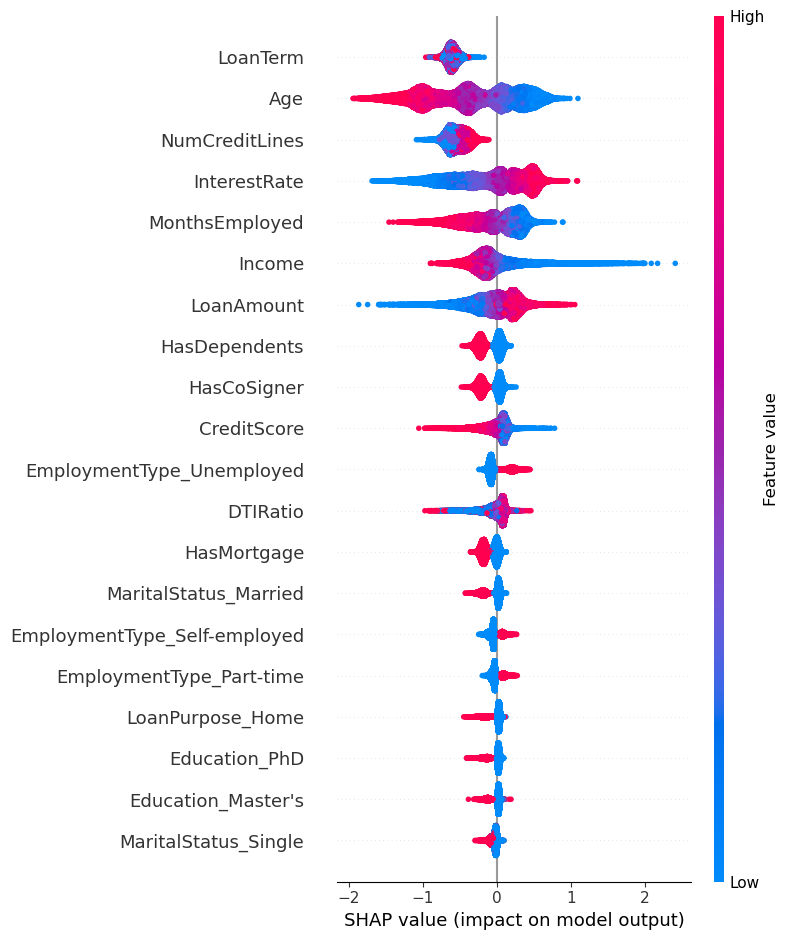

In [76]:
# Show SHAP Summary Plot
shap.summary_plot(shap_values, X_test)
